## Libraries

In [148]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import fnmatch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from natsort import natsorted 
import tensorflow_addons as tfa
import shutil
print(tf.__version__)

2.10.0


## Images of the dataset

In [149]:
dir_path = r'PNG'
count_img = len(fnmatch.filter(os.listdir(dir_path + '/images'), '*.png*'))
count_msk = len(fnmatch.filter(os.listdir(dir_path + '/labels'), '*.png*'))
print('Image Count:', count_img)
print('Image Mask:', count_msk)

Image Count: 205
Image Mask: 205


## Distribution of Dataset

### General Distribution

<BarContainer object of 4 artists>

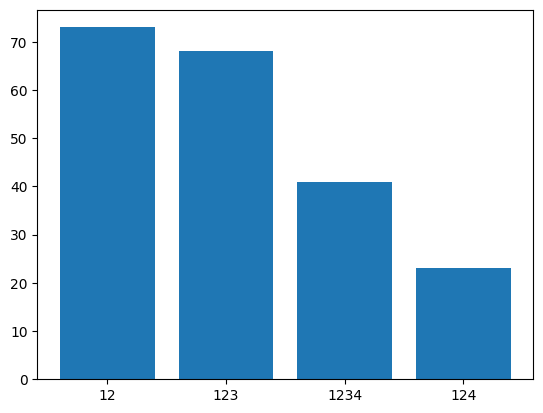

In [150]:
entries = []
masks = []
for mask_id in natsorted(os.listdir('PNG/labels/')):
    mask = PIL.Image.open(f'PNG/labels/{mask_id}')
    mask = np.array(mask)
    masks.append(mask)
    if (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask) and (4 in mask):
        classes = '1234'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask):
        classes = '123'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (4 in mask):
        classes = '124'
    elif (0 in mask) and (1 in mask) and (2 in mask):
        classes = '12'
    
    entry = {
        'id': mask_id.split(sep='.')[0],
        'class': classes
    }
    entries.append(entry)
df = pd.DataFrame(entries)#.to_csv('distribution.csv')
y = list(df['class'])
df = df['class'].value_counts().to_frame()
df['zones'] = df.index
plt.bar(df['zones'], df['class'])




### Stratified Split

In [151]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)
sss.get_n_splits(masks, y)
for i, (train_index, test_index) in enumerate(sss.split(masks, y)):
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

  Train: index=[ 88 164 121 161  12   7  22 179 106 194  82 132 107  93  51 110 197 142
  96 189 191  90  36 193 149  74  76   6 202 170  47   2  99 129  18  26
 152  45 131  65 181 123 184  85  50 136  38 160 167 127  41   5 138  73
  63 126 130 143 139   0 124  79  61  29  34 147  15 177 169 100  87 144
 119 165  52 171 109 137 163  94 156 159 155 101 195 158 108  14  86  55
 115 118  35  58  54  53 185   1  62  21  10 117 198 125 150 162 200 116
  81 122 203 173  32  56  16 140  77  30  72  20 182  48 190  42 151  37
  97  17 135  31  75  13  24 166 168  98  67  59 141 145  80  57 148 104
 102  64  46 153  83  43  11  19  89  49 113  71 178  60  68 192 187  70
  95 204  92  40 114 111 120  23 180 172 176 174]
  Test:  index=[105 157   9 133  27  44 154 183  28 196  78 201 128 186  39 146 188  66
 175  33 199   8  91 103   3  84 112   4  69  25 134]


### Training distribution

<BarContainer object of 4 artists>

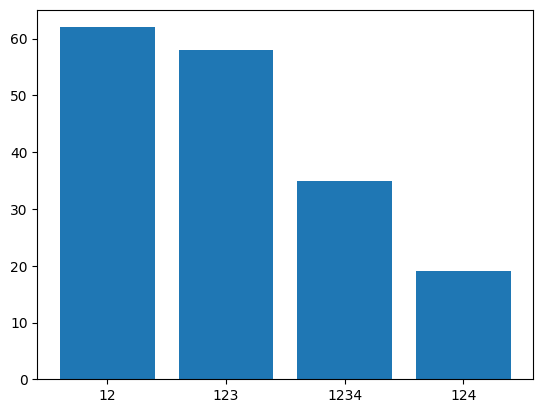

In [152]:
entries = []
masks = []
for mask_id in train_index:
    mask = PIL.Image.open(f'PNG/labels/{mask_id}.png')
    mask = np.array(mask)
    masks.append(mask)
    if (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask) and (4 in mask):
        classes = '1234'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask):
        classes = '123'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (4 in mask):
        classes = '124'
    elif (0 in mask) and (1 in mask) and (2 in mask):
        classes = '12'
    
    entry = {
        'id': mask_id,
        'class': classes
    }
    entries.append(entry)

    source_img = f'PNG/images/{mask_id}.png'
    destination_img = 'Train/images/{mask_id}.png'
    source_msk = f'PNG/labels/{mask_id}.png'
    destination_msk = f'Train/masks/{mask_id}.png'
    # copy only files
    if os.path.isfile(source_img) and os.path.isfile(source_msk):
        if not os.path.exists(destination_img):
            os.makedirs(destination_img)
        if not os.path.exists(destination_msk):
            os.makedirs(destination_msk)
        shutil.copy(source_img, destination_img)
        shutil.copy(source_msk, destination_msk)


df_train = pd.DataFrame(entries)#.to_csv('distribution_train.csv')
df_train = df_train['class'].value_counts().to_frame()
df_train['zones'] = df_train.index
plt.bar(df_train['zones'], df_train['class'])

### Testing distribution

<BarContainer object of 4 artists>

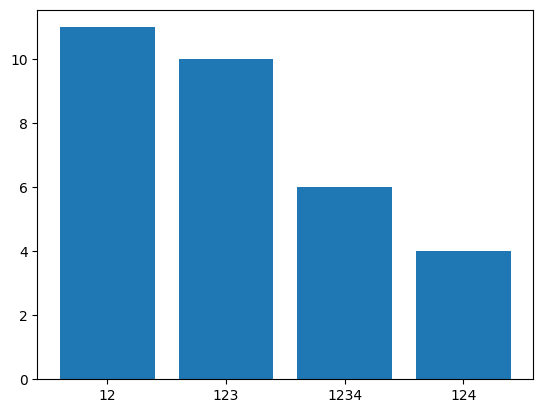

In [153]:
entries = []
masks = []
for mask_id in test_index:
    mask = PIL.Image.open(f'PNG/labels/{mask_id}.png')
    mask = np.array(mask)
    masks.append(mask)
    if (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask) and (4 in mask):
        classes = '1234'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask):
        classes = '123'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (4 in mask):
        classes = '124'
    elif (0 in mask) and (1 in mask) and (2 in mask):
        classes = '12'
    
    entry = {
        'id': mask_id,
        'class': classes
    }
    entries.append(entry)

    source_img = f'PNG/images/{mask_id}.png'
    destination_img = f'Test/images/{mask_id}.png'
    source_msk = f'PNG/labels/{mask_id}.png'
    destination_msk = f'Test/masks/{mask_id}.png'
    # copy only files
    if os.path.isfile(source_img) and os.path.isfile(source_msk):
        if not os.path.exists(destination_img):
            os.makedirs(destination_img)
        if not os.path.exists(destination_msk):
            os.makedirs(destination_msk)
        shutil.copy(source_img, destination_img)
        shutil.copy(source_msk, destination_msk)


df_test = pd.DataFrame(entries)#.to_csv('distribution_test.csv')
df_test = df_test['class'].value_counts().to_frame()
df_test['zones'] = df_test.index
# df_dist.plot.bar(x='zones', y='class', rot=0)
# print(df_dist)
plt.bar(df_test['zones'], df_test['class'])

### Distribution subplot

Text(0.5, 0, 'Zones Combination')

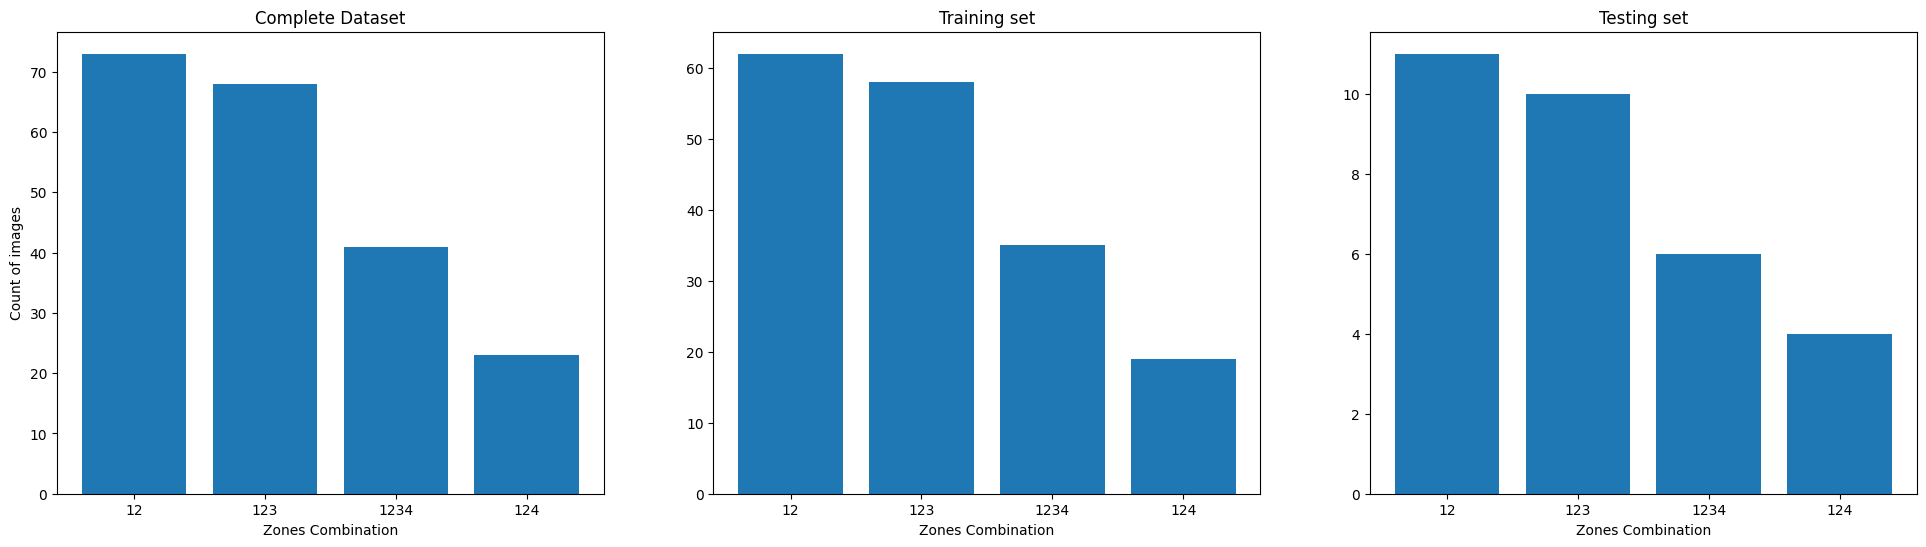

In [154]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
plt.bar(df['zones'], df['class'])
plt.ylabel('Count of images')
plt.xlabel('Zones Combination')
plt.title('Complete Dataset')
plt.subplot(1,3,2)
plt.bar(df_train['zones'], df_train['class'])
plt.title('Training set')
plt.xlabel('Zones Combination')
plt.subplot(1,3,3)
plt.bar(df_test['zones'], df_test['class'])
plt.title('Testing set')
plt.xlabel('Zones Combination')

## Create Dataset

In [155]:
BATCH_SIZE = None
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS=1
seed=42

10% of original dataset : Test. 10% of training set: Validation

In [156]:
# setting dictionary for the tf_data_dataset parameters
tf_Dataset_args=dict(labels=None,
                     label_mode=None,
                     batch_size=BATCH_SIZE,
                     image_size=(IMG_HEIGHT, IMG_WIDTH),
                     seed=seed,
                     color_mode="grayscale"
                     )
train_image_ds = tf.keras.utils.image_dataset_from_directory('Train\images',
                                                            # subset='training',
                                                            # validation_split=0.1,
                                                            **tf_Dataset_args
                                                            )
train_masks_ds = tf.keras.utils.image_dataset_from_directory('Train\masks',
                                                            # subset='training',
                                                            # validation_split=0.1,
                                                            **tf_Dataset_args
                                                            )


# val_image_ds = tf.keras.utils.image_dataset_from_directory('Train\images',
#                                                             subset='validation',
#                                                             # validation_split=0.1,
#                                                             **tf_Dataset_args
#                                                             )
# val_masks_ds = tf.keras.utils.image_dataset_from_directory('Train\masks',
#                                                             subset='validation',
#                                                             # validation_split=0.1,
#                                                             **tf_Dataset_args
#                                                             )


test_image_ds = tf.keras.utils.image_dataset_from_directory('Test\images',
                                                             **tf_Dataset_args
                                                             )
test_masks_ds = tf.keras.utils.image_dataset_from_directory('Test\masks',
                                                             **tf_Dataset_args
                                                             )

Found 174 files belonging to 1 classes.
Found 174 files belonging to 1 classes.
Found 31 files belonging to 1 classes.
Found 31 files belonging to 1 classes.


### Merge datasets

In [157]:
train_set=list(zip(train_image_ds, train_masks_ds))#
test_set=list(zip(test_image_ds, test_masks_ds))

train_data = tf.data.Dataset.from_tensor_slices((train_set))# Represents a potentially large set of elements.
test_data = tf.data.Dataset.from_tensor_slices((test_set))

Save dataset

In [158]:
test_data.save('test_ds')

### Plot example

(256, 256, 1)


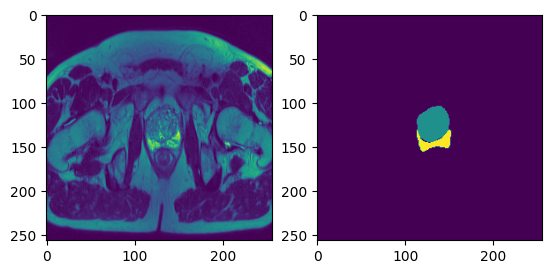

In [11]:
for i, j in test_data.take(1):
    plt.subplot(1,2,1)
    plt.imshow(i.numpy())
    plt.subplot(1,2,2)
    plt.imshow(j.numpy())
    print(j.numpy().shape)

### Preprocess image and mask

In [12]:
IMG_W = 256
IMG_H = 256
IMG_CH = 1
N_CLASSES = 5

def process(data):  
    img = data[0]
    msk = data[1]
    # img = tf.math.l2_normalize(img, axis=0)
    img = img/255

    msk = tf.squeeze(msk)
    msk = tf.cast(msk, tf.int32)
    msk = tf.one_hot(indices=msk, depth=N_CLASSES, axis=-1)

    img.set_shape([256,256,1])
    msk.set_shape([256,256,5])
    
    return img, msk

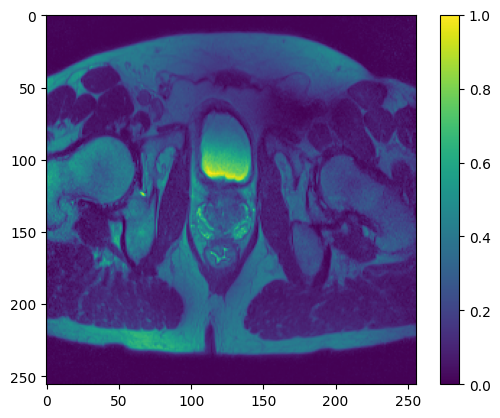

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_set = train_data.map(process, num_parallel_calls = AUTOTUNE)
test_set = test_data.map(process, num_parallel_calls = AUTOTUNE)

for i, j in train_set.take(1):
    # print(tf.shape(j))
    plt.imshow(i.numpy())
    plt.colorbar()
    plt.show()

In [14]:
BATCH_SIZE = 3
train_set = train_set.cache()
train_set = train_set.batch(BATCH_SIZE)

# Data augmentation

In [498]:
counter = tf.data.experimental.Counter()
temporary_ds = tf.data.Dataset.zip((train_set, (counter, counter)))

In [378]:
for i, j in temporary_ds.take(1):
    new_seed = tf.random.experimental.stateless_split(j, num=1)[0, :]
    print(j)
    print(new_seed)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
tf.Tensor([-6856063536328932722 -6061095977527908230], shape=(2,), dtype=int64)


### Brightness

In [136]:
@tf.function
def random_bright(image_mask, seed):
    image, mask = image_mask
    image = tf.image.stateless_random_brightness(image, max_delta=0.5, seed=seed)
    return image, mask, seed


### Contrast

In [143]:
@tf.function
def random_contrast(image_mask, seed):
    image, mask = image_mask
    image = tf.image.stateless_random_contrast(image, lower=0.5, upper=1, seed=seed)
    return image, mask, seed

### Random Flip

In [87]:
@tf.function
def random_flip(image_mask, seed):
    image, mask = image_mask
    # new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
    image = tf.image.stateless_random_flip_left_right(image, seed=seed)
    mask = tf.image.stateless_random_flip_left_right(mask, seed=seed)
    image = tf.image.stateless_random_flip_up_down(image, seed=seed)
    mask = tf.image.stateless_random_flip_up_down(mask, seed=seed)
    return image, mask, seed


### Rotate random 0-180

In [18]:
@tf.function
def random_rotation(image_mask, seed):
    image, mask = image_mask
    # new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
    num_samples = (tf.shape(image)[0])
    degrees = tf.random.stateless_uniform(
        shape=(num_samples,), seed=seed, minval=0, maxval=180
    )
    degrees = degrees * 0.017453292519943295  # convert the angle in degree to radians
    rotated_images = tfa.image.rotate(image, degrees)
    rotated_masks = tfa.image.rotate(mask, degrees)
    return rotated_images, rotated_masks, seed



### Noise

Normal Noise

In [126]:
@tf.function
def add_noise(image_mask, seed):
    image, mask = image_mask
    print(tf.shape(image))
    common_type = tf.float32 # Make noise and image of the same type
    random_std = tf.random.stateless_uniform([1], seed=seed, minval=0.0, maxval=0.01)
    gnoise = tf.random.stateless_normal(shape=tf.shape(image), mean=0.0, stddev=random_std, dtype=common_type, seed = seed)
    image_type_converted = tf.image.convert_image_dtype(image, dtype=common_type, saturate=False)
    image = tf.add(image_type_converted, gnoise)
    return image, mask, seed

Jpeg quality (revisar)

In [93]:
@tf.function
def random_noise(image_mask, seed):
    image, mask = image_mask
    image = tf.image.stateless_random_jpeg_quality(image[0], 40, 100, seed)
    return image, mask, seed


Salt & pepper

In [98]:
def salt_and_pepper(image_mask, seed):
    image, mask = image_mask
    prob_salt=0.01
    prob_pepper=0.01
    random_values = tf.random.uniform(shape=image[0, ..., -1:].shape)
    image = tf.where(random_values < prob_salt, 1., image)
    image = tf.where(1 - random_values < prob_pepper, 0., image)
    return image, mask

### Central Crop

In [110]:
def random_central_crop(image_mask, seed):
    image, mask = image_mask
    seed_int = int(seed[0])
# Define the random range of central_fraction
    min_fraction = 0.75
    max_fraction = 1
    # Generate random central_fraction
    central_fraction = tf.random.stateless_uniform([1], seed, minval=min_fraction, maxval=max_fraction)
    # Perform the central crop
    image = tf.image.central_crop(image, central_fraction[0])
    mask = tf.image.central_crop(mask, central_fraction[0])
    image = tf.image.resize(image, [256,256])
    mask = tf.image.resize(mask, [256, 256])
    return image, mask, seed

### Augmentation

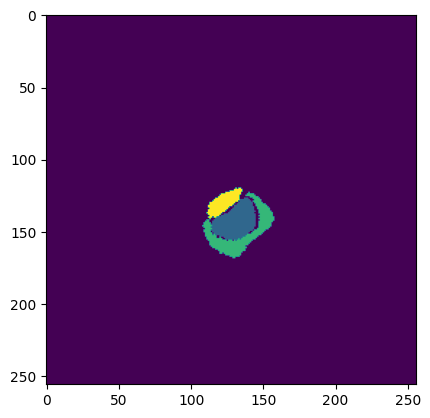

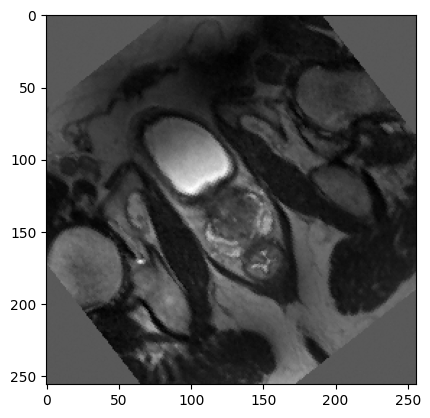

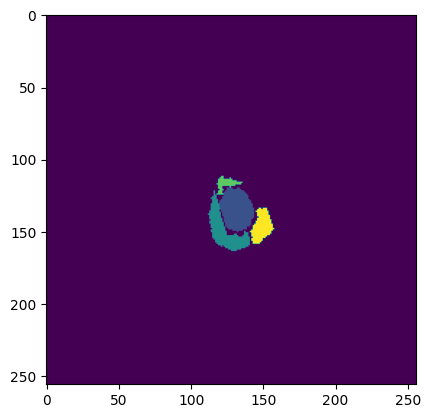

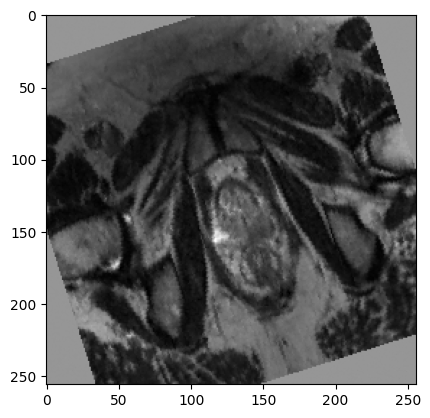

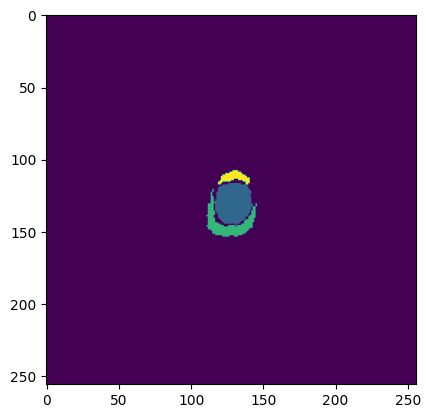

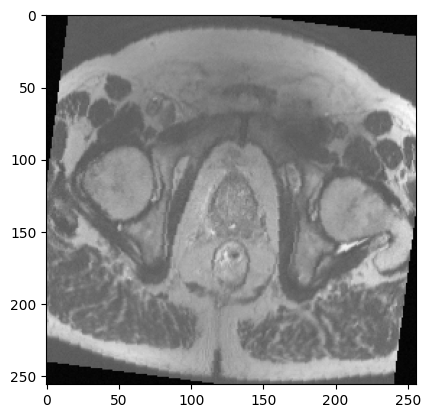

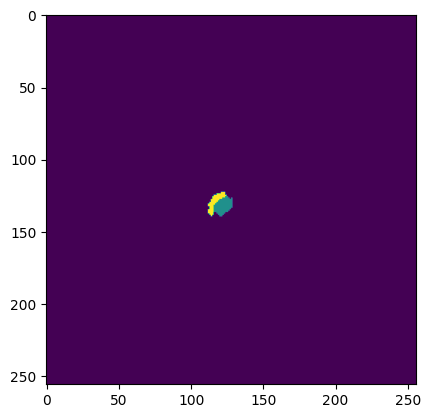

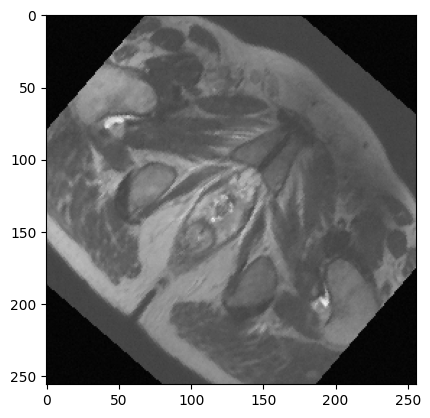

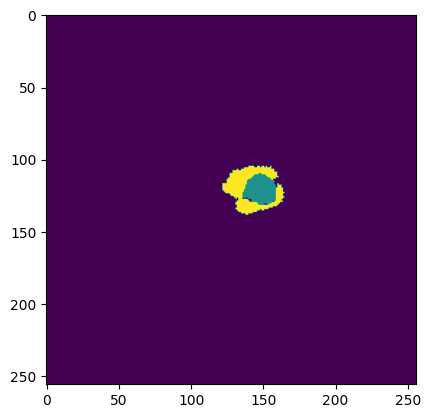

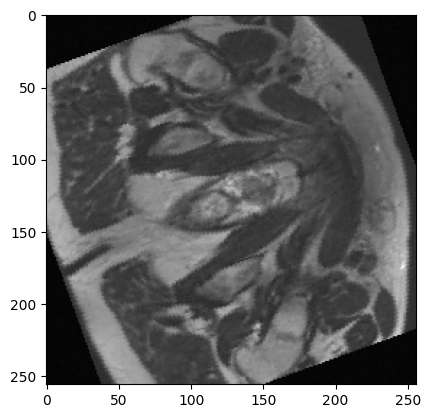

In [146]:
def augment(image_mask, seed):
    image, mask = image_mask
    # new_seed = tf.random.experimental.stateless_split(seed, num=1)[0][0]
    image, mask, xseed = random_central_crop((image, mask), seed)
    image, mask, xseed = random_bright((image, mask), seed)
    image, mask, xseed = random_contrast((image, mask), seed)
    image, mask, xseed = random_flip((image, mask), seed)
    image, mask, xseed = random_rotation((image, mask), seed)
    image, mask, xseed = add_noise((image, mask), seed)
    # image, mask = salt_and_pepper((image, mask), seed)
    # new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]

    # image = tf.clip_by_value(image, 0, 1)
    return image, mask


counter = tf.data.experimental.Counter()
training = tf.data.Dataset.zip((train_set, (counter, counter))).take(5)
# print(training)
temp_ds = training.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
# print(temp_ds)



for i, j in temp_ds:
    # print(tf.shape(i))
    # print(tf.shape(j))
    y = np.argmax(j[0].numpy(), axis=2)
    plt.imshow(y)
    plt.show()
    plt.imshow(i[0].numpy(), cmap='gray')
    plt.show()




# for i, seed in temporary_ds.take(1):
#     print(tf.shape(i[0][0]))
#     # print(tf.shape(j))
#     image = i[0][0]
#     print(tf.shape(image).numpy())
#     # image = tf.image.stateless_random_contrast(image, lower=0.9, upper=1, seed=seed)
#     # image_2 = tf.image.stateless_random_brightness(image, max_delta=0.95, seed=seed)
#     noise = tf.random.normal(shape=tf.shape(image).numpy(), mean=0.0, stddev=0.1, seed=seed)
#     image_1 = tf.clip_by_value(image + noise, 0, 1)
#     # y = np.argmax(j[0].numpy(), axis=2)
#     # plt.imshow(y)
#     # plt.show()
#     plt.imshow(image_1.numpy(), cmap='gray')
#     plt.show()
# # print(np.max(image_2))

In [ ]:
batch_size = 12
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)


### Possible metric (f1)

In [34]:
import tensorflow_addons as tfa
metric = tfa.metrics.F1Score(num_classes=3, threshold=None, average='macro')
y_true = np.array([[0, 0, 1],
                   [0, 1, 0],
                   [1, 0, 0]], np.int32)
print(y_true.shape)
y_pred = np.array([[0.2, 0.6, 0.7],
                   [0.2, 0.6, 0.7],
                   [0.8, 0.5, 0.0]], np.float32)
metric.update_state(y_true, y_pred)
result = metric.result()
result.numpy()



(3, 3)


0.5555556

## Dataset with validation*

In [12]:
# setting dictionary for the tf_data_dataset parameters
tf_Dataset_args=dict(labels=None,
                     label_mode=None,
                     #validation_split=0.1,
                     batch_size=BATCH_SIZE,
                     image_size=(IMG_HEIGHT, IMG_WIDTH),
                     seed=seed,
                     color_mode="grayscale"
                     )

#---------- train image split train/val
# image_dataset_from_directory is a utility function of keras taht generates a tf.data.Dataset from image files in a directory.
# And tf.data.Dataset represents a potentially large set of elements.
train_image_ds = tf.keras.utils.image_dataset_from_directory('PNG\images',
                                                             subset="training",
                                                             **tf_Dataset_args
                                                             )

validation_image_ds = tf.keras.utils.image_dataset_from_directory('PNG\images',
                                                                  subset="validation",
                                                                  **tf_Dataset_args
                                                                  )
#----------- train masks split train/val
train_masks_ds = tf.keras.utils.image_dataset_from_directory('PNG\labels',
                                                             subset="training",
                                                             **tf_Dataset_args
                                                             )
validation_masks_ds = tf.keras.utils.image_dataset_from_directory('PNG\labels',
                                                                  subset="validation",
                                                                  **tf_Dataset_args
                                                                  )

Found 205 files belonging to 1 classes.
Using 185 files for training.
Found 205 files belonging to 1 classes.
Using 20 files for validation.
Found 205 files belonging to 1 classes.
Using 185 files for training.
Found 205 files belonging to 1 classes.
Using 20 files for validation.


In [14]:
train_set=list(zip(train_image_ds, train_masks_ds))#
validation_set=list(zip(validation_image_ds, validation_masks_ds))

training_data = tf.data.Dataset.from_tensor_slices((train_set))# Represents a potentially large set of elements.
validation_data = tf.data.Dataset.from_tensor_slices((validation_set))

In [21]:
print(validation_data)

<TensorSliceDataset element_spec=TensorSpec(shape=(2, 256, 256, 1), dtype=tf.float32, name=None)>


In [27]:
validation_data.save('PNG')

(256, 256, 1)


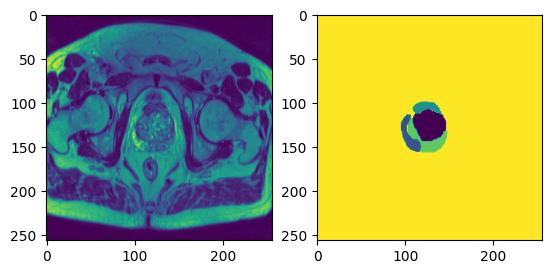

In [43]:
new_valset = tf.data.Dataset.load(r'PNG')
for i, j in new_valset.take(1):
    print(i.numpy().shape)
    plt.subplot(1,2,1)
    plt.imshow(i.numpy())
    plt.subplot(1,2,2)
    plt.imshow(j.numpy())